In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pauliSDP as psdp
import os
import cvxpy as cp
import exact_XY_model as XY

(CVXPY) Apr 25 11:12:16 PM: Encountered unexpected exception importing solver OSQP:
ImportError('dlopen(/Applications/miniconda3/envs/spins/lib/python3.12/site-packages/osqp/_osqp.cpython-312-darwin.so, 0x0002): symbol not found in flat namespace (_csc_matrix)')


Basis operator types: {'', 'YY', 'ZZ', 'XY', 'YZ', 'XX', 'Y', 'XZ', 'X', 'ZX', 'ZY', 'Z', 'YX'}
find M, Fmats time = 1.657217025756836
Number of dual variables: 1242
Solving SDP....
Result: -1.2822576769062213
solve time 11.155487060546875
Exact: -1.2745494843182374
SDP: -1.2822576769062213
Percent error: 0.6047778201492883


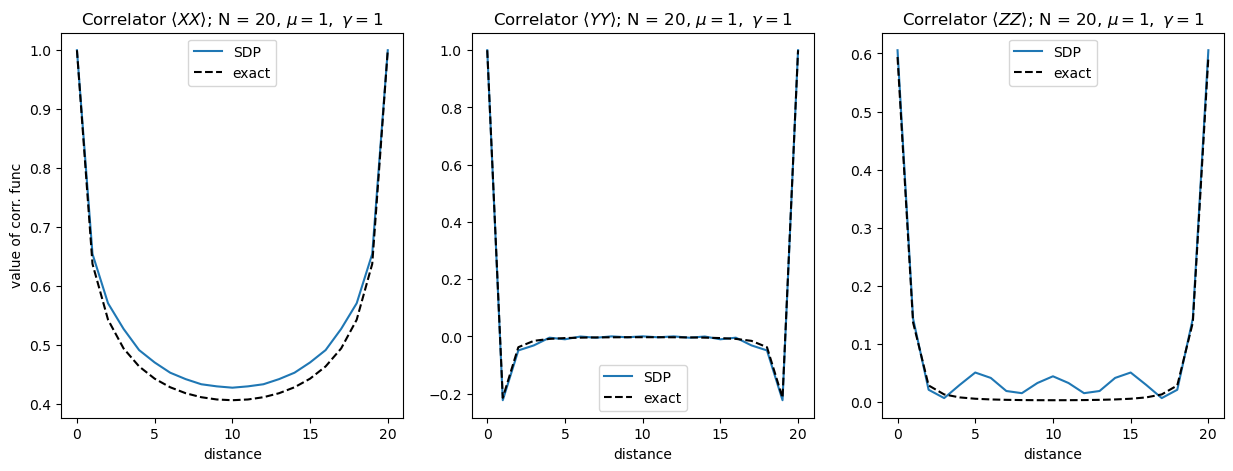

In [21]:
xx = psdp.to_op('XX')
z = psdp.to_op('Z')

h = -1*xx - z 

basis = ['X','Y','Z','XX','YY','ZZ','XY','YZ','XZ','ZX','ZY','YX']
basis = [psdp.to_op(x) for x in basis]

Nsites = 20

prob = psdp.pauliSDP(basis,Ham = h,N = Nsites,v = True,anchored = False,timed = True)

res,opt = prob.solve(add_extra_constraints = False)

exact = XY.XY_GS(1,1,Nsites)/Nsites

print("Exact:",exact)
print("SDP:",res)
print("Percent error:",abs((exact-res)/exact)*100)

psdp.XY_corrCompare(prob,1,1)

## Determine central charge

In [ ]:
xx = psdp.to_op('XX')
z = psdp.to_op('Z')

h = -1*xx - z

def fermion_basis(N):
    basis = ['X','Y','Z']
    basis = [psdp.to_op(x) for x in basis]